<a href="https://colab.research.google.com/github/Emmixert/Hands-On-De-ML-210111820-/blob/main/Tutorial_Regresion_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de la técnica

De acuerdo al primer articulo, una regresión polinomial es una donde los valores dependientes (x) e independientes (y) son polinomiales, es decir, genera una linea curva que cambia de trayectoria según la formula, para poder realizar fitting en datos que no son adecuados para una regresión lineal, es decir, hay una curva en los datos.

# Modelo matemático

Se explica que la refresión polinomial es un modelo extendido de la regresión lineal, también siendo un técnica de estádistica, usado cuando la set de datos muestra un patron no lineal.

Su formula es: **y = B0 + B1x + B2x^2 + ... + B*n*x^*n* + E**

Donde:

*   y es la variable dependiente.
*   x es la varianle independiente.
*   B0, B1, ..., Bn son los coeficientes del modelo.
*   E es el error.


# Librerías

*   **Pandas:** Permite manipular, limpiar y analizar datos de forma eficiente, utilizado comunmente para cargar archivos CSV, Excel, SQL, etc.
*   **Numpy:** Proporciona soporte para cálculos numéricos y manejo de arreglos (arrays) multidimensionales.
Es la base de muchas otras librerías científicas en Python.
*   **MatPlotLib.pyplot:** Sirve para crear gráficos y visualizaciones estáticas en 2D (barras, líneas, dispersión, histogramas, etc.), en este caso, nos servirá para graficar nuestros datos y nuestra regresión polinomial.
*   **Seaborn:** Es una librería basada en matplotlib que permite crear gráficos estadísticos más atractivos y fáciles de interpretar.
*   **Warnings:** Controla o suprime mensajes de advertencia que aparecen al ejecutar código. No afecta el resultado, pero ayuda a mantener la salida limpia.
*  **Sklearn:** Es una de las librerías más usadas para Machine Learning (aprendizaje automático) en Python, en este caso, será utilizado para entrenar nuestra regresión polinomial.







#Pipeline

## Preprocesamiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

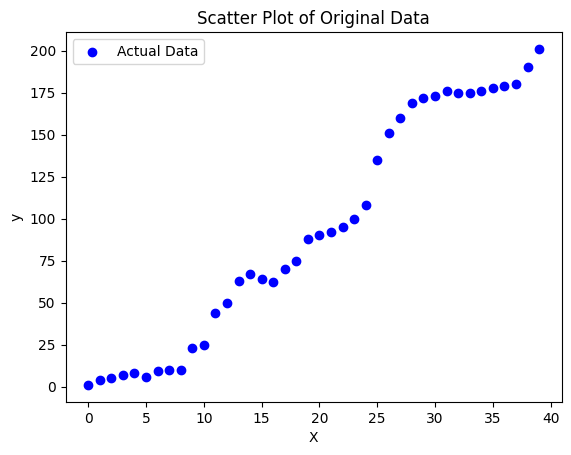

In [ ]:
X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y

plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

## Feature Engineering

Revisando el código, hay 4 variables que se emplean para realizar la regresión:

*   y (dependiente)
*   x (independiente)
*   test_size
*   random_state


## Model Selection

Revisando el dataset, se escogió un modelo polinomial sobre uno lineal debido al incremento inpredecible que posee la data set, teniendo periodos lentos y rápidos de crecimiento, siendo imposible de dar con un resultado de buen fitting en una regresión lineal.

## Model Training

In [ ]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']


poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

LinearRegression()

## Predictions

In [ ]:
# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

## Model Evaluation

In [ ]:

# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)


best_degree, train_error, test_error, train_accuracy, test_accuracy

(np.int64(3),
 82.12057919191898,
 93.19555930834686,
 0.9833308707514882,
 0.9716276725394738)